Made by: Bryan Chavez
Code was pulled from a few places and the references are at the bottom.

In [18]:
import numpy as np #three intial packages(numpy, matplotlib, and scipy)
import matplotlib.pyplot as plt
import scipy as sc

# ***********
Usage Guide
***********

This tutorial covers some basic usage patterns and best-practices to
help you get started with Matplotlib.


General Concepts
================

:mod:`matplotlib` has an extensive codebase that can be daunting to many
new users. However, most of matplotlib can be understood with a fairly
simple conceptual framework and knowledge of a few important points.

Plotting requires action on a range of levels, from the most general
(e.g., 'contour this 2-D array') to the most specific (e.g., 'color
this screen pixel red'). The purpose of a plotting package is to assist
you in visualizing your data as easily as possible, with all the necessary
control -- that is, by using relatively high-level commands most of
the time, and still have the ability to use the low-level commands when
needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top
of the hierarchy is the matplotlib "state-machine environment" which is
provided by the :mod:`matplotlib.pyplot` module. At this level, simple
functions are used to add plot elements (lines, images, text, etc.) to
the current axes in the current figure.

<div class="alert alert-info"><h4>Note</h4><p>Pyplot's state-machine environment behaves similarly to MATLAB and
   should be most familiar to users with MATLAB experience.</p></div>

The next level down in the hierarchy is the first level of the object-oriented
interface, in which pyplot is used only for a few functions such as figure
creation, and the user explicitly creates and keeps track of the figure
and axes objects. At this level, the user uses pyplot to create figures,
and through those figures, one or more axes objects can be created. These
axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding
matplotlib plots in GUI applications -- the pyplot level may be dropped
completely, leaving a purely object-oriented approach.


# Basic MatPlotLib

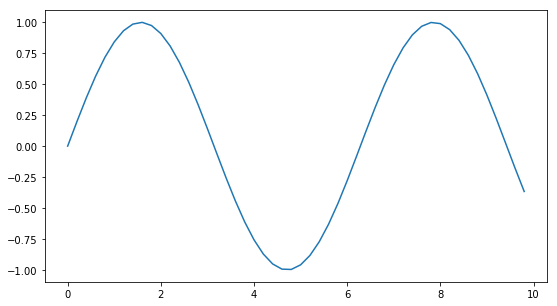

In [2]:
x = np.arange(0, 10, 0.2) #start by making an array of data
sinx = np.sin(x)
cosx = np.cos(x)
fig, ax = plt.subplots(figsize=(9,5)) #subplots allows for more plots used latter 
ax.plot(x, sinx) #this makes the plot
plt.show() #This 'prints' the plot

# Numpy & MatPlotlib

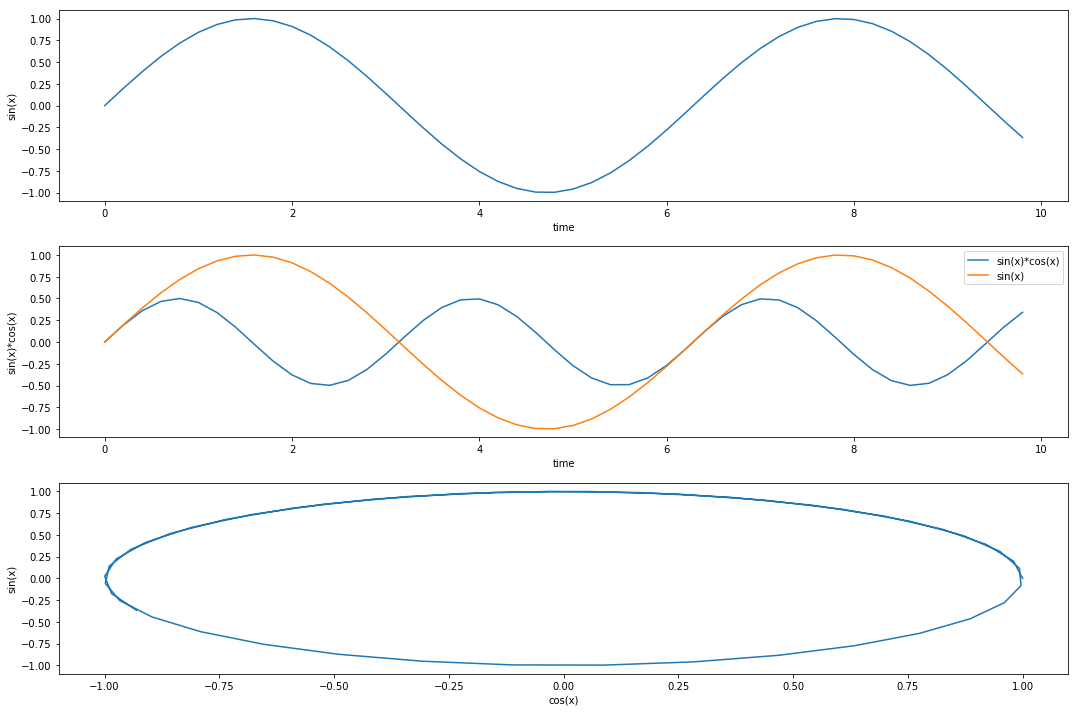

In [3]:
#Now lets take the data we made with numpy and manipulate it
#new array of data from sin(x)*cos(x)
sincos = sinx*cosx #manipulate the arrays with numpy
fig, ax = plt.subplots(3,1, figsize=(15,10)) #setup three subplots numbered from 0 to 2, figsize define the whole area
#first plot
ax[0].plot(x,sinx)
ax[0].set_xlabel('time')
ax[0].set_ylabel('sin(x)')

#sin(x)*cos(x)
ax[1].plot(x,sincos, label = 'sin(x)*cos(x)') #two plots on the same graph
ax[1].plot(x,sinx, label = 'sin(x)')
ax[1].legend()
ax[1].set_xlabel('time')
ax[1].set_ylabel('sin(x)*cos(x)')
#sin(x) vs cos(x)
ax[2].plot(cosx,sinx)
ax[2].set_xlabel('cos(x)')
ax[2].set_ylabel('sin(x)')

fig.tight_layout()
plt.show() #this will plot each different subplot on its own graph

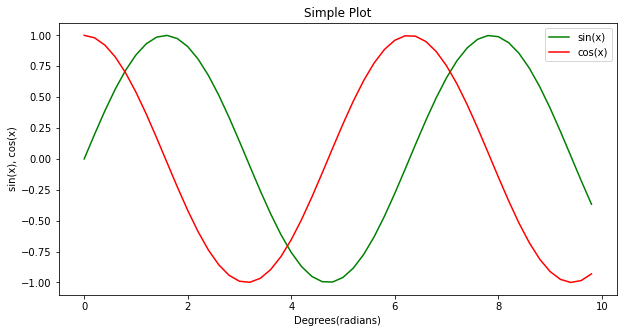

In [4]:
plt.figure(figsize=(10,5))
plt.plot(x,sinx, label= 'sin(x)', c = 'g') #plot different plot on same plot with Legend and colors
plt.plot(x,cosx, label= 'cos(x)', c = 'r') #basic two plots without subplots
plt.title("Simple Plot")
plt.xlabel('Degrees(radians)')
plt.ylabel('sin(x), cos(x)')
plt.legend()
fig.tight_layout()

plt.show()

# SciPy
Now Lets do some Curve Fitting of Scatter Sin(x) With SciPy

Lets make data

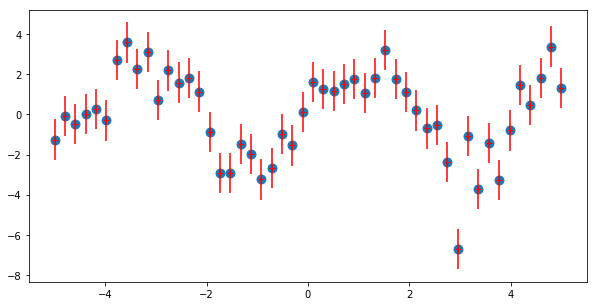

In [6]:
# Seed the random number generator for reproducibility
np.random.seed(194)

x_data = np.linspace(-5, 5, num=50) #setup x data
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50) #setup sin(x) random data
errors = np.zeros(len(y_data)) + 1
# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, s =80) #scatter plot
plt.errorbar(x_data,y_data,yerr = errors, fmt = "r+")
plt.show()

Now lets Fit the data

In [7]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x) #test function with fix of a*sin(b*x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[10, 1.5], sigma = errors) #fit of data

print(params)

[2.59699158 1.46783602]


Now lets plot the results

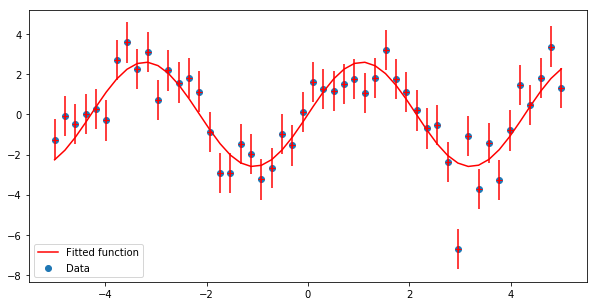

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function', c='r')
plt.errorbar(x_data,y_data,yerr = errors, fmt = "r+")
plt.legend(loc='best')

plt.show()

SciPy can also do Integration and Derviative and Solve Function

In [9]:
import numpy as np
def f1(x):
    return x**2 # x**2 is same as x^2

def f2(x):
    return x**3

x = np.array([1,3,4]) #x data to integrate with
y1 = f1(x)
from scipy.integrate import simps
I1 = simps(y1, x)
print(I1)

21.0


# Sympy

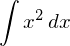

In [1]:
from sympy import *
init_printing()
x = Symbol('x')
Integral(x**2,x) #same integration but now visual


In [2]:
print(latex(Integral(x**2,x))) #latex code

\int x^{2}\, dx


In [11]:
integrate(cos(x),x)

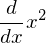

In [9]:
Derivative(x**2,x)

In [10]:
diff(x**2,x)

In [4]:
integrate(x**2,(x,1,4)) #definite integration

# Pandas

Now we will look at Pandas

In [12]:
import pandas as pd

#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
#plt.rcParams['figure.figsize'] = (15, 5)

broken_df = pd.read_csv('bikes.csv') #bike.csv is cycling info from Montreal, that is why it is French
# Look at the first 3 rows
broken_df[:3]



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 15: invalid continuation byte

In [13]:
fixed_df = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:4]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN


# 1.2 Selecting a column

In [14]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

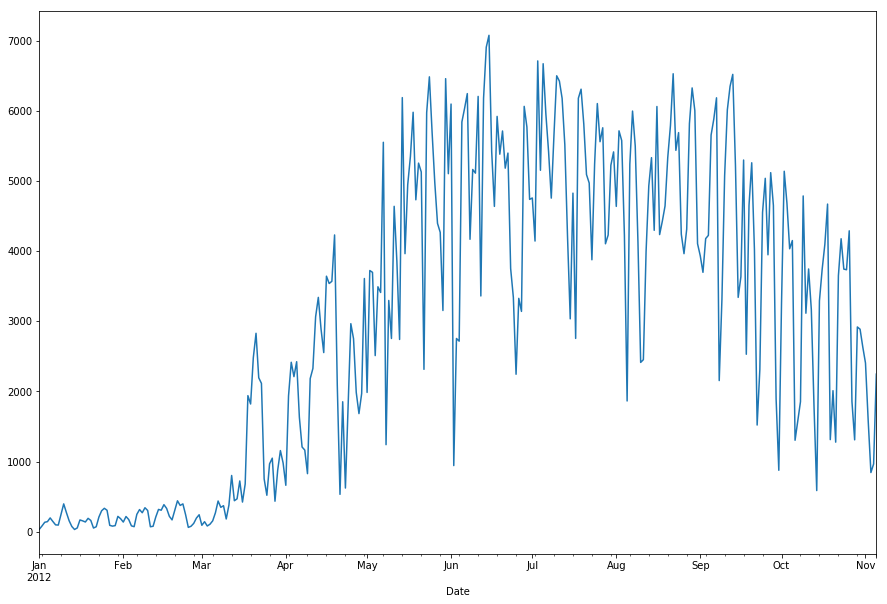

In [19]:
fixed_df['Berri 1'].plot(figsize=(15,10))
plt.show()

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

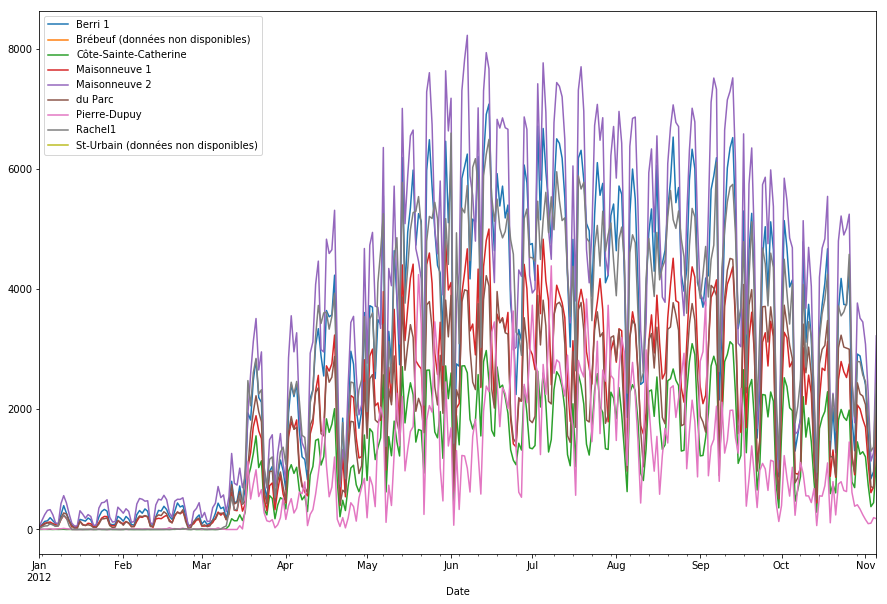

In [20]:
fixed_df.plot(figsize=(15, 10))
plt.show()

### Real physics data in Pandas

Here we will look at real physics data from the CLAS collaboration at JLab. Don't worry about knowing the physics behind this it is more to see how you can load manipulate save the data using pandas and numpy.

In [21]:
import pandas as pd
data = pd.read_csv("511_lab_E_100k.csv.bz2")
data.head()

,p,cx,cy,cz
0,2.92318,-0.099648,0.304981,0.947131
1,2.02305,0.357481,0.053205,0.932404
2,2.38504,0.373008,0.068695,0.925282
3,3.94044,-0.161400,-0.244957,0.956005
4,3.26964,-0.376418,0.056365,0.924734


In [22]:
# Describe the data
data.describe()

,p,cx,cy,cz
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.809895,-0.009248,0.000167,0.927430
std,0.797405,0.276466,0.249021,0.036664
min,1.500080,-0.677151,-0.676080,0.726911
25%,2.096775,-0.248829,-0.234165,0.910984
50%,2.804645,-0.096869,-0.002730,0.937082
75%,3.511635,0.230567,0.237127,0.954553
max,4.557770,0.672610,0.662856,0.974583


In [23]:
@np.vectorize
def q2_calc(px, py, pz):
    e_beam = np.array([0, 0, 4.8, 4.8])
    e_prime = np.array([px, py, pz, np.linalg.norm([px, py, pz, 0.000511])])
    temp = e_beam - e_prime
    temp2 = temp[0]*temp[0]+temp[1]*temp[1]+temp[2]*temp[2]-temp[3]*temp[3]
    return temp2

@np.vectorize
def W_calc(px, py, pz):
    e_beam = np.array([0, 0, 4.8, 4.8])
    e_prime = np.array([px, py, pz, np.linalg.norm([px, py, pz, 0.000511])])
    p_targ = np.array([0, 0, 0.0, 0.93828])
    temp = e_beam - e_prime + p_targ
    temp2 = temp[0]*temp[0]+temp[1]*temp[1]+temp[2]*temp[2]-temp[3]*temp[3]
    return np.sqrt(-temp2)

In [24]:
%%time
# Niave way of working with data:
# Make some arrays
px = []
py = []
pz = []
q2 = []
w = []
# Loop over all the rows
for index, row in data.iterrows():
    # Do your calculation and fill the array
    px.append(row.p*row.cx)
    py.append(row.p*row.cy)
    pz.append(row.p*row.cz)
    q2.append(q2_calc(px[-1],py[-1],pz[-1]))
    w.append(W_calc(px[-1],py[-1],pz[-1]))
        
# Place the arrays into the dataframe
data['px'] = px
data['py'] = py
data['pz'] = pz
data['q2'] = q2
data['w'] = w

CPU times: user 34.3 s, sys: 492 ms, total: 34.8 s
Wall time: 35.1 s


In [28]:
%%time
# Without looping we can caluclate everything much faster
data['px'] = data['cx'] * data['p']
data['py'] = data['cy'] * data['p']
data['pz'] = data['cz'] * data['p']
# Using the @np.vectorize dectorator on the functions allows them to work
# Over all the columns without looping
data['q2'] = q2_calc(data['px'],data['py'],data['pz'])
data['w'] = W_calc(data['px'],data['py'],data['pz'])

CPU times: user 2.92 s, sys: 33 ms, total: 2.96 s
Wall time: 2.96 s


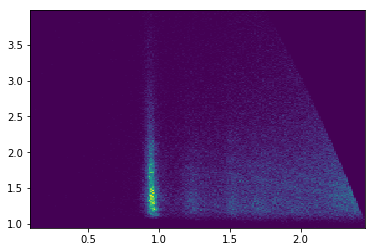

In [29]:
# Plot pandas data from matplotlib
# Simple variables names without spaces can be called like this:
plt.hist2d(data.w, data.q2, bins=200)
plt.show()

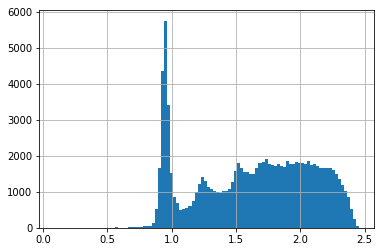

In [31]:
# Or plot directly from pandas df
data['w'].hist(bins=100)
plt.show()

To calculate $\theta = \arccos\left(cos_z\right)$

To calculate $\phi = \arctan2\left(cos_x, cos_y\right)$

In [32]:
# Or use already made numpy functions to do our calculations
data['theta'] = np.arccos(data.cz)
data['phi'] = np.arctan2(data.cx, data.cy)

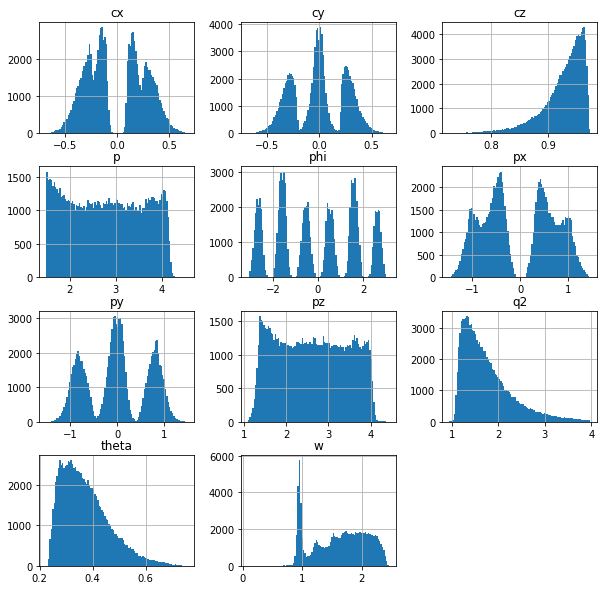

In [33]:
# We can plot all the data from a dataframe at once
data.hist(bins=100, figsize=(10,10))
plt.show()

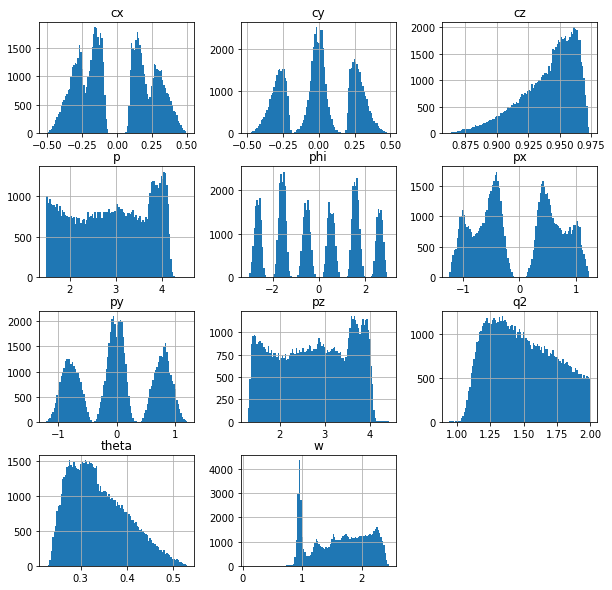

In [34]:
# And make cuts to the data and save as new dataframes
data_2 = data[data.q2 < 2.0]

data_2.hist(bins=100, figsize=(10,10))
plt.show()

# References

[1] https://matplotlib.org/tutorials/index.html
[2] https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html